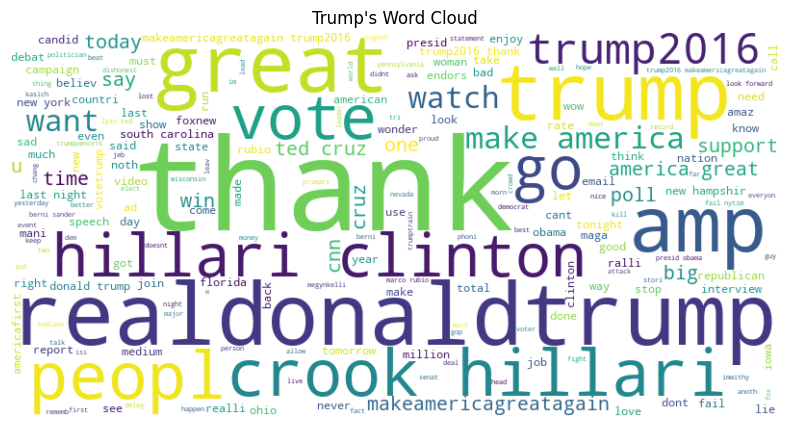

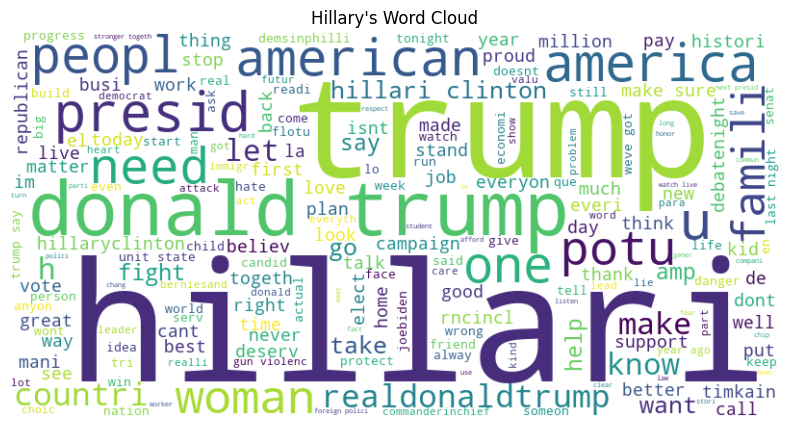

C:\Users\张博洋\AppData\Local\Temp\ipykernel_2732\824645737.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='handle', y='retweet_count', data=engagement_metrics, palette='Blues', ax=ax, label="Retweets")
C:\Users\张博洋\AppData\Local\Temp\ipykernel_2732\824645737.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='handle', y='favorite_count', data=engagement_metrics, palette='Reds', ax=ax, label="Likes")


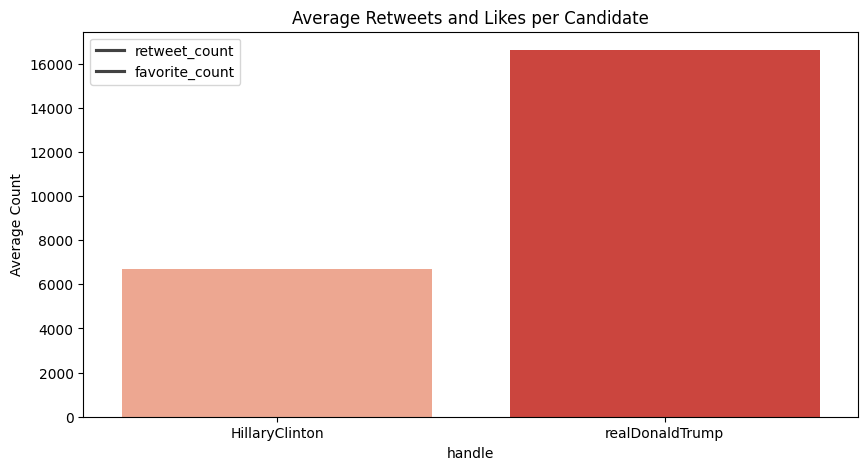

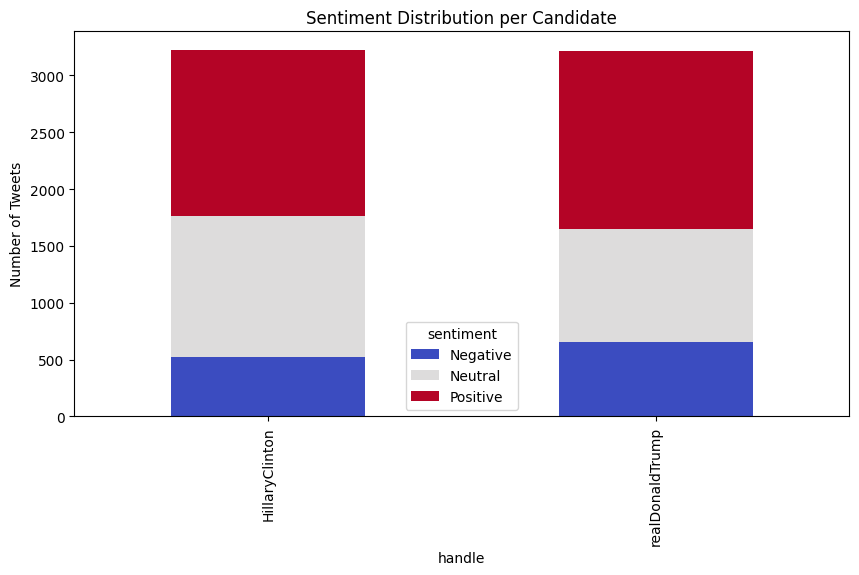

<Figure size 1000x500 with 0 Axes>

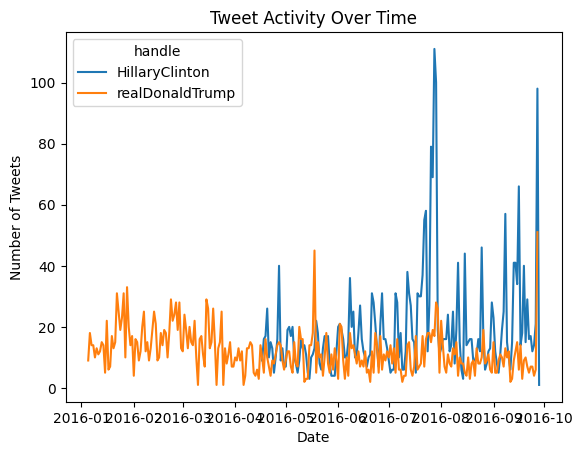

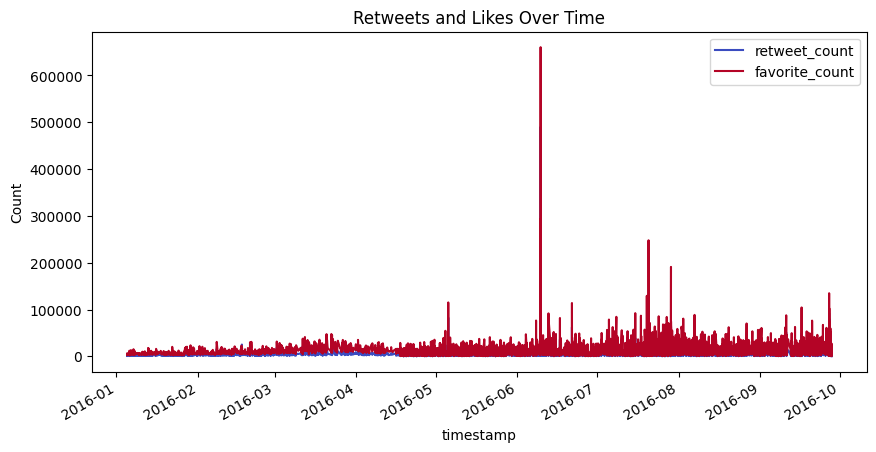

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
import numpy as np
import plotly.express as px

# Load the dataset
df = pd.read_csv('C:/Users/张博洋/Desktop/processed_data.csv')

# --- Step 1: Key Themes Identification - Word Cloud ---
# Generate word cloud for Trump's and Hillary's tweets
trump_tweets = df[df['handle'] == 'realDonaldTrump']['text_clean'].str.cat(sep=' ')
hillary_tweets = df[df['handle'] == 'HillaryClinton']['text_clean'].str.cat(sep=' ')

# Create Trump Word Cloud
trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trump_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(trump_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Trump's Word Cloud")
plt.show()

# Create Hillary Word Cloud
hillary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hillary_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(hillary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Hillary's Word Cloud")
plt.show()

# --- Step 2: Engagement Metrics (Likes and Retweets) - Bar Chart ---
# Group by candidate and calculate average likes and retweets
engagement_metrics = df.groupby('handle')[['retweet_count', 'favorite_count']].mean().reset_index()

# Plot engagement metrics
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='handle', y='retweet_count', data=engagement_metrics, palette='Blues', ax=ax, label="Retweets")
sns.barplot(x='handle', y='favorite_count', data=engagement_metrics, palette='Reds', ax=ax, label="Likes")
ax.set_title('Average Retweets and Likes per Candidate')
ax.set_ylabel('Average Count')
plt.legend(['retweet_count', 'favorite_count'])
plt.show()

# --- Step 3: Sentiment Analysis - Bar Chart ---
# Perform sentiment analysis on tweets
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on polarity score
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Sentiment distribution per candidate
sentiment_distribution = df.groupby(['handle', 'sentiment']).size().unstack().fillna(0)

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Sentiment Distribution per Candidate')
plt.ylabel('Number of Tweets')
plt.show()

# --- Step 4: Time Series of Tweet Activity ---
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['time'])

# Plot time series of tweet activity for both candidates
plt.figure(figsize=(10, 5))
df.groupby([df['timestamp'].dt.date, 'handle']).size().unstack().plot()
plt.title('Tweet Activity Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.show()

# --- Step 5: Candidate Comparison (Likes and Retweets Over Time) - Line Chart ---
# Plot retweets and likes over time for both candidates
df.set_index('timestamp', inplace=True)

# Create line plot for retweets and likes
df[['retweet_count', 'favorite_count']].plot(figsize=(10, 5), colormap='coolwarm')
plt.title('Retweets and Likes Over Time')
plt.ylabel('Count')
plt.show()
